# Лабораторная работа 1. Вариант 5.

In [43]:
import pandas as pd
import numpy as np

## Задание 1

Загрузить данные из файла avianHabitat.csv. Подготовить данные для
дальнейшего анализа, убрав нулевые элемент. 

Делать это будем с помощью встроенных функций библиотеки pandas.

In [27]:
df = pd.DataFrame(pd.read_csv(r'avianHabitat.csv'))

df

,Site,Observer,Subpoint,VOR,PDB,DBHt,PW,WHt,PE,EHt,PA,AHt,PH,HHt,PL,LHt,PB
0,BunkerHill27,RA,1,6.0,3,5.2,0,0.0,4,2.9,0,0.0,4,3.0,0,0.0,0
1,BunkerHill27,RA,2,4.5,2,3.1,3,4.7,3,4.1,0,0.0,3,3.5,2,1.0,0
2,BunkerHill27,RA,3,2.0,4,5.5,1,5.8,3,3.9,0,0.0,3,7.5,0,0.0,0
3,BunkerHill27,RA,4,2.5,3,6.2,0,0.0,3,4.0,0,0.0,4,5.0,0,0.0,0
4,BunkerHill27,RA,5,4.0,4,5.4,0,0.0,3,3.5,0,0.0,4,3.7,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,McAdamCreek21,RR,6,1.0,0,0.0,3,1.0,2,2.2,0,0.0,4,3.3,0,0.0,0
1066,McAdamCreek21,RR,7,1.5,4,5.0,2,1.3,2,1.7,0,0.0,3,5.4,2,0.6,0
1067,McAdamCreek21,RR,8,8.0,0,0.0,5,10.2,3,1.5,0,0.0,1,2.6,1,0.7,0
1068,McAdamCreek21,RR,9,3.0,0,0.0,5,10.1,3,3.1,0,0.0,3,2.2,0,0.0,0


Посчитаем количество нулевых элементов

In [35]:
df.isna().sum()

Site        0
Observer    0
Subpoint    0
VOR         0
PDB         0
DBHt        0
PW          0
WHt         0
PE          0
EHt         0
PA          0
AHt         0
PH          0
HHt         0
PL          0
LHt         0
PB          0
dtype: int64

Как можем увидеть, пустых полей у нас нет, поэтому можем сразу перейти к анализу данных.

## Задание 2

Рассчитать для переменных, описывающих высоту растений (*Ht), следующие значения(по вариантам):
+ Максимальное и минимальное значения;
+ Размах распределения;
+ Среднее значения;
+ Медиану;
+ Моду;
+ Дисперсию;
+ Среднеквадратическое отклонение;
+ Первый и третий квартиль;
+ Интерквартильный размах;
+ Ассиметрию;
+ Эксцесс.

Большинство из данных значений можно получить с помощью функции df.describe(), которая выведет нам описательные статистики выбранной переменной. По варианту будем рассматривать переменную HHt

In [46]:
df['HHt'].describe()

count    1070.000000
mean        2.321028
std         1.280982
min         0.000000
25%         1.400000
50%         2.300000
75%         3.100000
max         8.200000
Name: HHt, dtype: float64

Отсюда видно, что:
+ Максимальное значение = 8.2, минимальное значение = 0;
+ Размах распределение = max - min = 8.2;
+ Среднее значение = 2.321028;
+ Первый квартиль = 1.4, третий квартиль = 3.1;
+ Интерквартильный размах = 3.1 - 1.4 = 1.7;
  
Для вычисления оставшихся значений воспользуемся функциями pandas.

In [70]:
print(f'Медиана = {df['HHt'].median()}')
print(f'Мода = {df['HHt'].mode()}')
print(f'Дисперсия = {df['HHt'].var()}')
print(f'Среднеквадратичное отклонение = {df['HHt'].var()**(1/2)}')
print(f'Ассиметрия = {df['HHt'].skew()}')
print(f'Эксцесс = {df['HHt'].kurtosis()}')

Медиана = 2.3
Мода = 0    2.2
Name: HHt, dtype: float64
Дисперсия = 1.640913815864245
Среднеквадратичное отклонение = 1.2809815829527935
Ассиметрия = 0.5319323371016482
Эксцесс = 0.8309991831944887


## Задание 3

Построить диаграмму с усами (boxplot) для Ваших данных.

Строить диаграмму будем с помощью библиотеки Seaborn

<Axes: ylabel='HHt'>

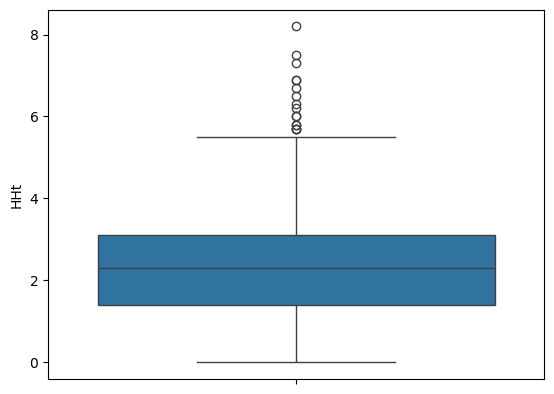

In [78]:
import seaborn as sns

sns.boxplot(df['HHt'])

## Задание 4

Построить на одном рисунке диаграммы с усами Вашего и соседнего варианта.

Дополнительно построим ящик с усами шестого варианта 6 (LHt).

<Axes: >

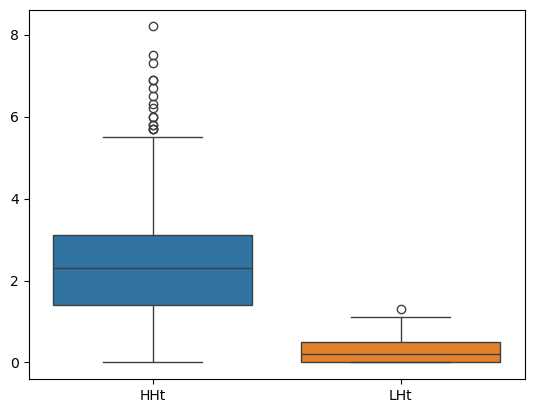

In [81]:
sns.boxplot(df[['HHt','LHt']])

## Задание 5

Построить эмпирическую функцию распределения (построить самим и
воспользоваться реализованными функциями (при наличии), сравнить
результат

Строить эмпирическую функцию будем путем деления каждого элемента нашего столбца на общее число элементов..

In [89]:
df_sorted = sorted(df['HHt'])

cdf = pd.DataFrame( {0: df_sorted, 1:np.arange(len(df_sorted))/len(df_sorted)} )
cdf

,0,1
0,0.0,0.000000
1,0.0,0.000935
2,0.0,0.001869
3,0.0,0.002804
4,0.0,0.003738
...,...,...
1065,6.9,0.995327
1066,6.9,0.996262
1067,7.3,0.997196
1068,7.5,0.998131


Построим график полученной эмпирической функции.

<Axes: xlabel='Высота травяных растений'>

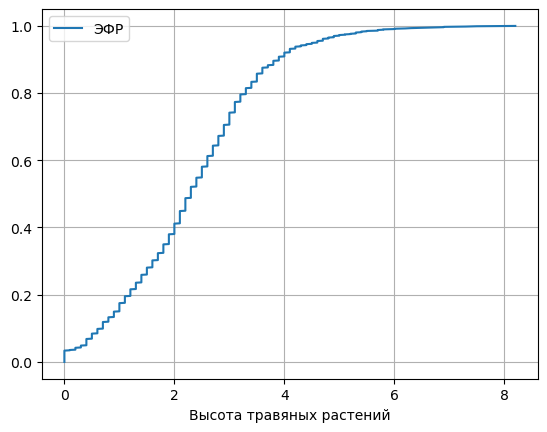

In [109]:
cdf.plot(0,1, grid=True, label='ЭФР', xlabel='Высота травяных растений')